In [1]:
## Financial Planner

In [76]:
# Initial imports
import datetime as dt
import pytz
import numpy as np
import pandas as pd
import os
import requests
#from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi
%matplotlib inline

# Create the Alpaca API object
alpaca_api_key = 'PKQZAH0P29PQ2NC7M56L'
alpaca_secret_key = 'a3ObINwHQKH0JfbfeNdXPGJGSmfpNwyYHU7rrFJp'
alpaca_crypto = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://data.alpaca.markets/v1beta1/crypto",
    api_version="v2")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [77]:
# Create two variables called my_btc and my_eth
my_btc = 1.2
my_eth = 5.3

In [78]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [79]:
import requests

## PARSE API JSON RESPONSE AND SELECT ONLY CRYPTO PRICES FOR BITCOIN

In [32]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18973806,
   'total_supply': 18973806,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 41532.0,
     'volume_24h': 23856794034,
     'market_cap': 786230682320,
     'percentage_change_1h': -0.632218971251002,
     'percentage_change_24h': -5.28480595609698,
     'percentage_change_7d': 8.26059044358649,
     'percent_change_1h': -0.632218971251002,
     'percent_change_24h': -5.28480595609698,
     'percent_change_7d': 8.26059044358649},
    'CAD': {'price': 52675.0356,
     'volume_24h': 30257571873.3222,
     'market_cap': 997176374386.457,
     'percent_change_1h': -0.632218971251002,
     'percent_change_24h': -5.28480595609698,
     'percent_change_7d': 8.26059044358649}},
   'last_updated': 1646359167}},
 'metadata': {'timestamp': 1646359167,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [33]:
btc_response['data']

{'1': {'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'website_slug': 'bitcoin',
  'rank': 1,
  'circulating_supply': 18973806,
  'total_supply': 18973806,
  'max_supply': 21000000,
  'quotes': {'USD': {'price': 41532.0,
    'volume_24h': 23856794034,
    'market_cap': 786230682320,
    'percentage_change_1h': -0.632218971251002,
    'percentage_change_24h': -5.28480595609698,
    'percentage_change_7d': 8.26059044358649,
    'percent_change_1h': -0.632218971251002,
    'percent_change_24h': -5.28480595609698,
    'percent_change_7d': 8.26059044358649},
   'CAD': {'price': 52675.0356,
    'volume_24h': 30257571873.3222,
    'market_cap': 997176374386.457,
    'percent_change_1h': -0.632218971251002,
    'percent_change_24h': -5.28480595609698,
    'percent_change_7d': 8.26059044358649}},
  'last_updated': 1646359167}}

In [34]:
btc_response['data']['1']

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'website_slug': 'bitcoin',
 'rank': 1,
 'circulating_supply': 18973806,
 'total_supply': 18973806,
 'max_supply': 21000000,
 'quotes': {'USD': {'price': 41532.0,
   'volume_24h': 23856794034,
   'market_cap': 786230682320,
   'percentage_change_1h': -0.632218971251002,
   'percentage_change_24h': -5.28480595609698,
   'percentage_change_7d': 8.26059044358649,
   'percent_change_1h': -0.632218971251002,
   'percent_change_24h': -5.28480595609698,
   'percent_change_7d': 8.26059044358649},
  'CAD': {'price': 52675.0356,
   'volume_24h': 30257571873.3222,
   'market_cap': 997176374386.457,
   'percent_change_1h': -0.632218971251002,
   'percent_change_24h': -5.28480595609698,
   'percent_change_7d': 8.26059044358649}},
 'last_updated': 1646359167}

In [35]:
btc_response['data']['1']['quotes']

{'USD': {'price': 41532.0,
  'volume_24h': 23856794034,
  'market_cap': 786230682320,
  'percentage_change_1h': -0.632218971251002,
  'percentage_change_24h': -5.28480595609698,
  'percentage_change_7d': 8.26059044358649,
  'percent_change_1h': -0.632218971251002,
  'percent_change_24h': -5.28480595609698,
  'percent_change_7d': 8.26059044358649},
 'CAD': {'price': 52675.0356,
  'volume_24h': 30257571873.3222,
  'market_cap': 997176374386.457,
  'percent_change_1h': -0.632218971251002,
  'percent_change_24h': -5.28480595609698,
  'percent_change_7d': 8.26059044358649}}

In [36]:
btc_response['data']['1']['quotes']['CAD']

{'price': 52675.0356,
 'volume_24h': 30257571873.3222,
 'market_cap': 997176374386.457,
 'percent_change_1h': -0.632218971251002,
 'percent_change_24h': -5.28480595609698,
 'percent_change_7d': 8.26059044358649}

In [37]:
btc_response['data']['1']['quotes']['CAD']['price']

52675.0356

In [38]:
# Current BITCOIN price 
btc_price = btc_response['data']['1']['quotes']['CAD']['price']
btc_price

52675.0356

# PARSE API JSON RESPONSE AND SELECT ONLY CRYPTO PRICES FOR ETHERIUM

In [39]:
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_response = requests.get(eth_url).json()
eth_response['data']

{'1027': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'website_slug': 'ethereum',
  'rank': 2,
  'circulating_supply': 119814586,
  'total_supply': 119814586,
  'max_supply': 0,
  'quotes': {'USD': {'price': 2732.42,
    'volume_24h': 15296081473,
    'market_cap': 326022741147,
    'percentage_change_1h': -0.960150533538154,
    'percentage_change_24h': -7.33359511757617,
    'percentage_change_7d': 5.0958960496212,
    'percent_change_1h': -0.960150533538154,
    'percent_change_24h': -7.33359511757617,
    'percent_change_7d': 5.0958960496212},
   'CAD': {'price': 3465.528286,
    'volume_24h': 19400020132.2059,
    'market_cap': 413494642596.74,
    'percent_change_1h': -0.960150533538154,
    'percent_change_24h': -7.33359511757617,
    'percent_change_7d': 5.0958960496212}},
  'last_updated': 1646359148}}

In [40]:
eth_response['data']

{'1027': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'website_slug': 'ethereum',
  'rank': 2,
  'circulating_supply': 119814586,
  'total_supply': 119814586,
  'max_supply': 0,
  'quotes': {'USD': {'price': 2732.42,
    'volume_24h': 15296081473,
    'market_cap': 326022741147,
    'percentage_change_1h': -0.960150533538154,
    'percentage_change_24h': -7.33359511757617,
    'percentage_change_7d': 5.0958960496212,
    'percent_change_1h': -0.960150533538154,
    'percent_change_24h': -7.33359511757617,
    'percent_change_7d': 5.0958960496212},
   'CAD': {'price': 3465.528286,
    'volume_24h': 19400020132.2059,
    'market_cap': 413494642596.74,
    'percent_change_1h': -0.960150533538154,
    'percent_change_24h': -7.33359511757617,
    'percent_change_7d': 5.0958960496212}},
  'last_updated': 1646359148}}

In [41]:
eth_response['data']['1027']

{'id': 1027,
 'name': 'Ethereum',
 'symbol': 'ETH',
 'website_slug': 'ethereum',
 'rank': 2,
 'circulating_supply': 119814586,
 'total_supply': 119814586,
 'max_supply': 0,
 'quotes': {'USD': {'price': 2732.42,
   'volume_24h': 15296081473,
   'market_cap': 326022741147,
   'percentage_change_1h': -0.960150533538154,
   'percentage_change_24h': -7.33359511757617,
   'percentage_change_7d': 5.0958960496212,
   'percent_change_1h': -0.960150533538154,
   'percent_change_24h': -7.33359511757617,
   'percent_change_7d': 5.0958960496212},
  'CAD': {'price': 3465.528286,
   'volume_24h': 19400020132.2059,
   'market_cap': 413494642596.74,
   'percent_change_1h': -0.960150533538154,
   'percent_change_24h': -7.33359511757617,
   'percent_change_7d': 5.0958960496212}},
 'last_updated': 1646359148}

In [42]:
eth_response['data']['1027']['quotes']

{'USD': {'price': 2732.42,
  'volume_24h': 15296081473,
  'market_cap': 326022741147,
  'percentage_change_1h': -0.960150533538154,
  'percentage_change_24h': -7.33359511757617,
  'percentage_change_7d': 5.0958960496212,
  'percent_change_1h': -0.960150533538154,
  'percent_change_24h': -7.33359511757617,
  'percent_change_7d': 5.0958960496212},
 'CAD': {'price': 3465.528286,
  'volume_24h': 19400020132.2059,
  'market_cap': 413494642596.74,
  'percent_change_1h': -0.960150533538154,
  'percent_change_24h': -7.33359511757617,
  'percent_change_7d': 5.0958960496212}}

In [43]:
eth_response['data']['1027']['quotes']['CAD']

{'price': 3465.528286,
 'volume_24h': 19400020132.2059,
 'market_cap': 413494642596.74,
 'percent_change_1h': -0.960150533538154,
 'percent_change_24h': -7.33359511757617,
 'percent_change_7d': 5.0958960496212}

In [44]:
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']
print(eth_price)

3465.528286


In [45]:
# Current etherium price 
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']
eth_price

3465.528286

In [46]:
# create dataframe with the current amount of crypto assets
# set current amount of crypto assets
crypto_data = {
    "crypto": [1.2, 5.3]
}

# Set the tickers 
tickers = ["BTC", "ETH"]

# create the crypto dataframe
df_crypto = pd.DataFrame(crypto_data, index=tickers)

#Display crypto data 
df_crypto

,crypto
BTC,1.2
ETH,5.3


In [47]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [48]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-19", tz="US/Central").isoformat()

In [49]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [50]:
tickers

['BTC', 'ETH']

In [51]:
print(alpaca_api_key)

PKQZAH0P29PQ2NC7M56L


In [26]:
# # Get current price data for BTC  and ETH
df_portfolio = alpaca.get_barset(
    ["SPY","AGG"],
    timeframe,
    start = today,
    end = today
).df
# Display sample data
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2022-01-19 00:00:00-05:00  111.7  111.89  111.65  111.71  7641972  458.17   

                                                               
                               high     low   close    volume  
time                                                           
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79  95311817

In [52]:
#  Fetch current BTC price
btc_price

52675.0356

In [53]:
# Fetch current ETH price
eth_price

3465.528286

In [54]:
# Compute current value of my crpto
btc_value = btc_response["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_price
eth_value = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63210.04
The current value of your 5.3 ETH is $18367.30


## Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
my_agg = 200
my_spy = 50

In [56]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}

In [57]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [58]:
# create the shares  dataframe 
df_shares = pd.DataFrame(shares_data, index=tickers)

#display shares data 
df_shares

,shares
AGG,200
SPY,50


In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = ALPACA_API_KEY
alpaca_secret_key = ALPACA_SECRET_KEY

In [60]:
type(alpaca_secret_key)

str

In [61]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [ ]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-06", tz="America/New_York").isoformat()

In [ ]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [62]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview dataframe
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2022-01-19 00:00:00-05:00  111.7  111.89  111.65  111.71  7641972  458.17   

                                                               
                               high     low   close    volume  
time                                                           
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79  95311817

In [63]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.71
Current SPY closing price: $451.79


In [64]:
#compute the current value in dollars of stock portfolio
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

In [65]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22589.50
The current value of your 200 AGG shares is $22342.00


## Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings 

,amount
crypto,81577.342636
shares,44931.500000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

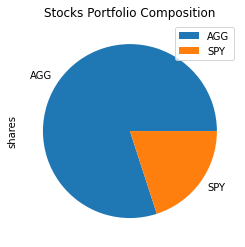

In [68]:
# Plot savings pie chart
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

In [69]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your goal")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratulations, you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [70]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG","SPY"]

In [ ]:
# Set Alpaca Api Key and Secret 
alpaca_api_key = ALPACA_API_KEY
alpaca_secret_key = ALPACA_SECRET_KEY

In [72]:
type(alpaca_secret_key)

str

In [73]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [82]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_ticker.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [83]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [84]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [85]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [86]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\HW-4-API-updated-\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996009,1.001671,0.994807,0.996398,0.998319,0.997087,0.991995,0.999135,1.009119,0.995208,...,1.001089,1.001035,0.998331,0.999045,0.999484,1.004637,1.003843,0.999322,1.003949,1.006103
2,0.998667,0.992302,0.996753,0.996000,1.001773,0.994635,1.004080,1.000739,1.010921,0.997703,...,0.999583,1.005374,1.003519,0.997374,0.997106,1.002108,0.995894,0.990872,1.000826,1.011281
3,0.994614,0.993150,1.000986,1.001766,1.001528,1.000079,1.000789,1.002927,1.010878,0.986826,...,0.997267,0.999143,1.002716,0.995101,0.996596,1.002855,1.004119,0.983434,1.003594,1.013857
4,1.005771,0.997146,1.010676,0.995785,1.013977,0.999683,1.002840,1.010786,1.011589,0.990401,...,0.999022,1.005597,1.006362,0.993369,0.995700,1.000679,1.004604,0.981834,1.003679,1.012999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.347757,8.051647,9.302194,5.480578,8.660140,4.036378,2.732412,6.315354,3.412264,7.725156,...,10.709033,4.337164,4.551887,9.602001,2.153488,3.970658,5.592774,3.439185,4.829366,10.704424
7557,7.350605,8.008085,9.332189,5.442085,8.662268,4.056772,2.726871,6.287143,3.461105,7.770253,...,10.677153,4.366938,4.544678,9.567005,2.147864,3.942881,5.603776,3.440433,4.835596,10.775137
7558,7.331736,8.005418,9.304770,5.474609,8.648677,4.054576,2.687642,6.298283,3.482541,7.768038,...,10.743741,4.380545,4.546590,9.530616,2.142364,3.957544,5.600504,3.442230,4.872132,10.732262
7559,7.359260,8.072018,9.201167,5.473859,8.629250,4.069514,2.688630,6.328651,3.491587,7.804876,...,10.810624,4.354002,4.614805,9.543993,2.169062,3.919004,5.575203,3.431307,4.862341,10.742119


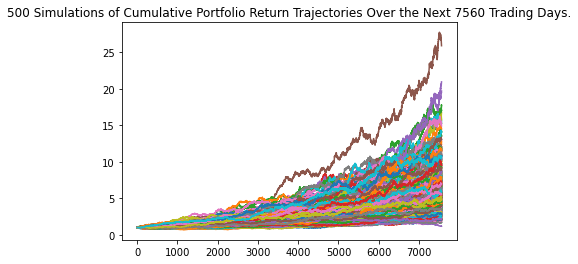

In [87]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

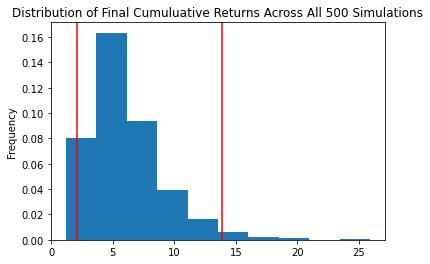

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.107429
std               3.130862
min               1.180955
25%               3.985016
50%               5.475014
75%               7.477100
max              25.901292
95% CI Lower      2.127196
95% CI Upper     13.832675
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [90]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42543.92 and $276653.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\HW-4-API-updated-\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999570,1.011078,1.005477,1.002969,1.005149,0.998497,1.002842,1.002705,1.008731,0.993194,...,0.993319,0.985579,1.007815,0.989029,0.996059,0.995191,0.987306,1.002501,0.999251,1.009110
2,0.985589,1.008294,0.985698,1.000350,1.004274,0.994526,1.013460,0.992241,1.009082,0.987172,...,0.999334,0.993767,1.010153,0.982242,0.992842,0.995514,0.998181,1.002702,1.004010,1.017579
3,0.991136,1.006742,0.989898,0.992979,0.993904,1.002497,1.004682,0.993282,1.021957,0.985171,...,1.007731,0.996078,1.028885,0.979993,0.993117,1.012344,1.007460,1.004308,1.009987,1.026962
4,0.999776,1.008169,1.001677,0.986749,0.988079,0.999093,0.995763,0.994303,1.037418,0.989361,...,1.013263,0.997076,1.039506,0.981328,0.994151,1.017806,1.012521,1.003853,1.018638,1.035234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.295594,1.595587,1.530734,1.253424,0.918541,2.260830,1.262155,2.299231,1.172196,1.495743,...,1.494927,1.174638,1.362551,1.334481,0.975083,1.287478,1.562579,1.200552,1.096555,1.436235
1257,1.294625,1.607667,1.532289,1.251023,0.920214,2.293929,1.270886,2.278972,1.163674,1.499627,...,1.484820,1.171169,1.362216,1.338828,0.973695,1.285341,1.564357,1.195624,1.095250,1.437961
1258,1.303972,1.595487,1.546670,1.237559,0.932561,2.306232,1.280735,2.270276,1.177469,1.518656,...,1.490167,1.170914,1.351151,1.325262,0.984294,1.290313,1.587576,1.184454,1.087246,1.457008
1259,1.306788,1.605710,1.575345,1.231952,0.933440,2.283998,1.290501,2.269646,1.178720,1.489248,...,1.494736,1.176737,1.337431,1.311643,0.977543,1.286513,1.578268,1.175301,1.071025,1.457996


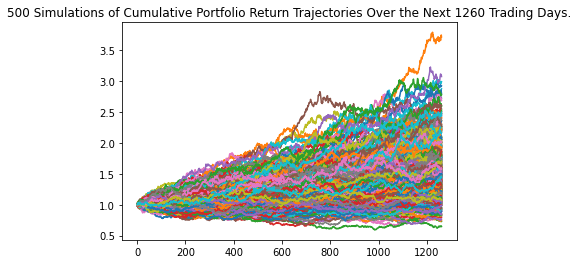

In [93]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

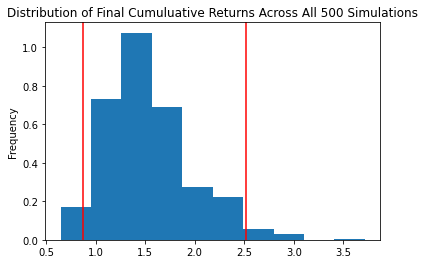

In [95]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.531222
std               0.433832
min               0.646824
25%               1.227096
50%               1.468166
75%               1.760134
max               3.716917
95% CI Lower      0.870446
95% CI Upper      2.517730
Name: 1260, dtype: float64


In [97]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52226.77 and $151063.79


# Ten Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [99]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\orkhan\Desktop\HW-4-API-updated-\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015647,1.001203,0.991560,0.998942,0.994550,0.996090,1.004274,1.000487,0.997435,1.004876,...,1.005092,0.986976,1.002533,1.002839,0.999830,1.007414,0.990215,1.000066,1.000945,0.989531
2,1.023063,0.999583,1.002523,0.997276,1.003286,0.995575,0.996638,1.001962,1.000235,1.005298,...,1.006549,0.986509,1.007693,1.003251,1.004491,1.010241,0.998048,1.005952,0.998280,0.992216
3,1.027853,0.991506,1.010276,1.001113,1.011406,0.992621,0.988729,0.997420,0.998612,1.001847,...,1.016979,0.981751,1.017764,1.001013,0.988634,1.023027,1.009112,1.004290,0.992435,0.997926
4,1.024898,0.995117,1.012815,1.014540,1.012754,0.998849,0.992601,0.996034,1.000781,1.009624,...,1.021423,0.981496,1.001115,1.003038,0.985071,1.002264,1.017713,0.992656,0.994474,1.018177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.872843,2.193074,1.604334,1.891916,5.062336,1.405856,2.910986,2.093623,1.611597,2.933625,...,1.926016,1.405047,3.214223,1.829952,1.456895,2.374957,1.117687,3.445260,2.188460,3.700454
2517,3.929552,2.196219,1.596311,1.918310,5.067532,1.427950,2.914747,2.114493,1.620287,2.942370,...,1.897168,1.395353,3.190292,1.853494,1.436688,2.353096,1.126113,3.469111,2.189756,3.667656
2518,3.911914,2.223096,1.594090,1.917124,5.092664,1.418532,2.943447,2.099716,1.629141,2.956559,...,1.887929,1.396843,3.207662,1.827670,1.455847,2.341701,1.140202,3.437517,2.182470,3.674157
2519,3.917259,2.246849,1.591489,1.926625,5.104128,1.411383,2.968094,2.099675,1.636282,2.990001,...,1.899413,1.428213,3.228448,1.839249,1.463747,2.363662,1.151843,3.448787,2.199883,3.637588


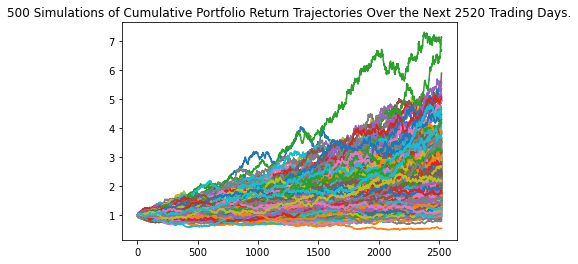

In [100]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

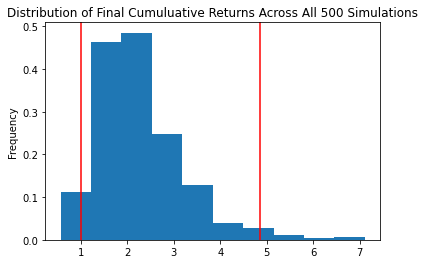

In [101]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.277454
std               0.929831
min               0.558602
25%               1.622658
50%               2.091873
75%               2.705477
max               7.112509
95% CI Lower      0.999317
95% CI Upper      4.848732
Name: 2520, dtype: float64


In [103]:
# Set initial investment
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59959.03 and $290923.9
